<a href="https://colab.research.google.com/github/nasare34/Machine-Learning-Based-Prediction-of-Rabies-Outbreaks-Using-Epidemiological-and-Env.-Data-in-Africa/blob/main/Rabbies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary library
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install scikit-learn xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:


# Uploading the file
uploaded = files.upload()

# After uploading, load the CSV into a DataFrame
import pandas as pd

# okay, so the file name is 'encoded_outbreak.csv'
df = pd.read_csv('encoded_outbreak.csv')

# Displaying the first few rows of the DataFrame
df.head()


Saving encoded_outbreak.csv to encoded_outbreak.csv


,Unnamed: 0,ward_mnth_yr,n_livestock,n_Domestic dog,n_wildlife,n_Unknown,n_Known,n_Not vaccinated,n_Vaccinated,n_Killed,suspected_cases,Ward,dog_pop,vax_coverage
0,0,Sedeco_01_2002,2,2,0,2,2,4,0,1,1,Sedeco,354.0,0.215773
1,1,Busawe_01_2003,1,0,0,0,1,1,0,0,0,Busawe,417.0,0.202380
2,2,Kenyamonta_01_2003,0,7,0,1,6,7,0,7,7,Kenyamonta,585.0,0.201403
3,3,Geitasamo_01_2004,0,2,0,0,2,1,1,0,1,Geitasamo,262.0,0.184641
4,4,Kebanchebanche_01_2004,0,26,0,0,26,20,6,5,17,Kebanchebanche,352.0,0.182585


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1d2dU8DN-XsFknZc-rlv88BOlAdgAAU8Py12Q-9jk-14#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Display basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1019 non-null   int64  
 1   ward_mnth_yr      1019 non-null   object 
 2   n_livestock       1019 non-null   int64  
 3   n_Domestic dog    1019 non-null   int64  
 4   n_wildlife        1019 non-null   int64  
 5   n_Unknown         1019 non-null   int64  
 6   n_Known           1019 non-null   int64  
 7   n_Not vaccinated  1019 non-null   int64  
 8   n_Vaccinated      1019 non-null   int64  
 9   n_Killed          1019 non-null   int64  
 10  suspected_cases   1019 non-null   int64  
 11  Ward              1019 non-null   object 
 12  dog_pop           996 non-null    float64
 13  vax_coverage      996 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 111.6+ KB


In [ ]:
# Checking for missing values in the DataFrame
df.isnull().sum()


,0
Unnamed: 0,0
ward_mnth_yr,0
n_livestock,0
n_Domestic dog,0
n_wildlife,0
n_Unknown,0
n_Known,0
n_Not vaccinated,0
n_Vaccinated,0
n_Killed,0


In [ ]:
df_filled_mean = df.copy()
df_filled_mean['dog_pop'].fillna(df['dog_pop'].mean(), inplace=True)
df_filled_mean['vax_coverage'].fillna(df['vax_coverage'].mean(), inplace=True)


In [ ]:
# Display the first few rows to confirm the filling
df_filled_mean.head()

,Unnamed: 0,ward_mnth_yr,n_livestock,n_Domestic dog,n_wildlife,n_Unknown,n_Known,n_Not vaccinated,n_Vaccinated,n_Killed,suspected_cases,Ward,dog_pop,vax_coverage
0,0,Sedeco_01_2002,2,2,0,2,2,4,0,1,1,Sedeco,354.0,0.215773
1,1,Busawe_01_2003,1,0,0,0,1,1,0,0,0,Busawe,417.0,0.202380
2,2,Kenyamonta_01_2003,0,7,0,1,6,7,0,7,7,Kenyamonta,585.0,0.201403
3,3,Geitasamo_01_2004,0,2,0,0,2,1,1,0,1,Geitasamo,262.0,0.184641
4,4,Kebanchebanche_01_2004,0,26,0,0,26,20,6,5,17,Kebanchebanche,352.0,0.182585


In [ ]:
print(df_filled_mean.isnull().sum())

Unnamed: 0          0
ward_mnth_yr        0
n_livestock         0
n_Domestic dog      0
n_wildlife          0
n_Unknown           0
n_Known             0
n_Not vaccinated    0
n_Vaccinated        0
n_Killed            0
suspected_cases     0
Ward                0
dog_pop             0
vax_coverage        0
dtype: int64


In [ ]:
# Fill missing values in 'dog_pop' and 'vax_coverage' with their respective medians
df_filled_median = df.copy()
df_filled_median['dog_pop'].fillna(df['dog_pop'].median(), inplace=True)
df_filled_median['vax_coverage'].fillna(df['vax_coverage'].median(), inplace=True)

# Displaying the first few rows to confirm the filling
df_filled_median.head()

#  checking if any missing values remain
print(df_filled_median.isnull().sum())


Unnamed: 0          0
ward_mnth_yr        0
n_livestock         0
n_Domestic dog      0
n_wildlife          0
n_Unknown           0
n_Known             0
n_Not vaccinated    0
n_Vaccinated        0
n_Killed            0
suspected_cases     0
Ward                0
dog_pop             0
vax_coverage        0
dtype: int64


In [ ]:
# Getting the  statistical summary of the numeric columns
df.describe()


,Unnamed: 0,n_livestock,n_Domestic dog,n_wildlife,n_Unknown,n_Known,n_Not vaccinated,n_Vaccinated,n_Killed,suspected_cases,dog_pop,vax_coverage
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,996.000000,996.000000
mean,509.000000,0.798822,6.357213,0.056919,0.025515,7.187439,3.294406,2.372915,1.450442,1.805692,685.570281,0.175911
std,294.304264,2.266125,10.268688,0.236000,0.215638,10.919297,4.838012,5.138197,2.231285,2.660105,253.546765,0.103590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.000000,0.001960
25%,254.500000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,491.000000,0.100030
50%,509.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,636.500000,0.158246
75%,763.500000,1.000000,7.000000,0.000000,0.000000,8.000000,4.000000,3.000000,2.000000,2.000000,829.000000,0.233857
max,1018.000000,28.000000,150.000000,2.000000,4.000000,158.000000,54.000000,65.000000,26.000000,26.000000,1508.000000,0.630315


In [ ]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Displaying unique values for each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("\n")


ward_mnth_yr: 1019 unique values
ward_mnth_yr
Sedeco_01_2002             1
Uwanja wa Ndege_08_2015    1
Majimoto_08_2013           1
Mbalibali_08_2013          1
Rigicha_08_2013            1
                          ..
Kenyamonta_05_2005         1
Kisangura_05_2005          1
Nyamoko_05_2005            1
Ring'wani_05_2005          1
Sedeco_12_2021             1
Name: count, Length: 1019, dtype: int64


Ward: 27 unique values
Ward
Rung'abure         100
Sedeco              84
Mosongo             72
Nyamoko             66
Kebanchebanche      63
Majimoto            60
Ring'wani           53
Machochwe           52
Nyansurura          48
Mbalibali           47
Kisangura           43
Kisaka              38
Mugumu              33
Nyamatare           32
Uwanja wa Ndege     32
Kyambahi            30
Kenyamonta          29
Geitasamo           27
Nyambureti          20
Busawe              17
Manchira            16
Magange             15
Issenye             13
Natta               12
Ikoma        

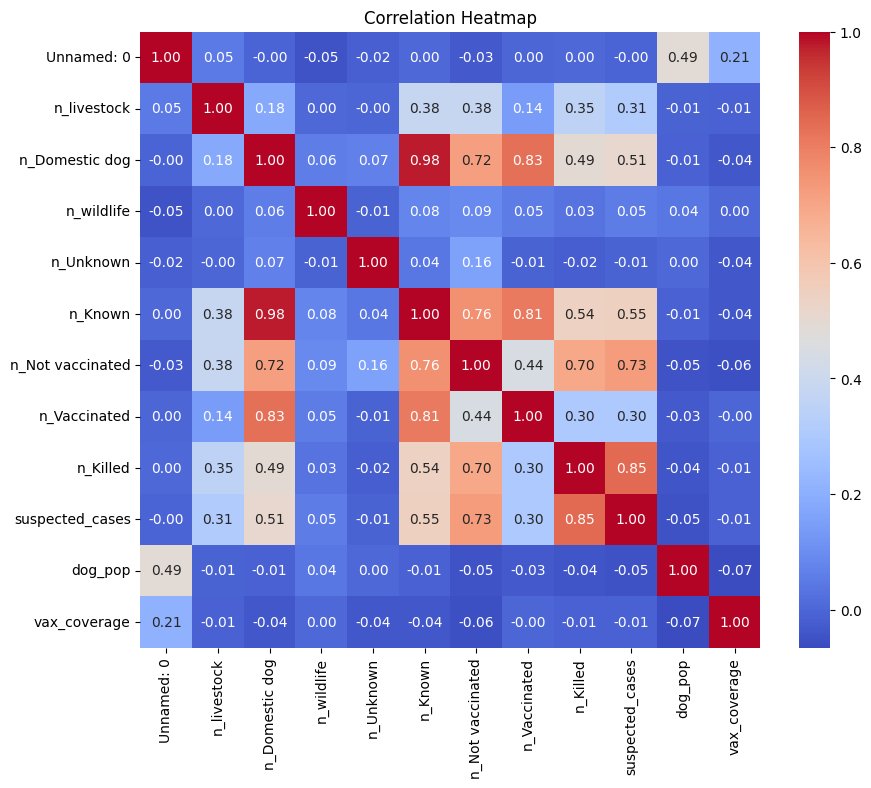

In [ ]:
# Computing the correlation matrix, only including numeric columns
corr = df.corr(numeric_only=True)

# I Generating a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

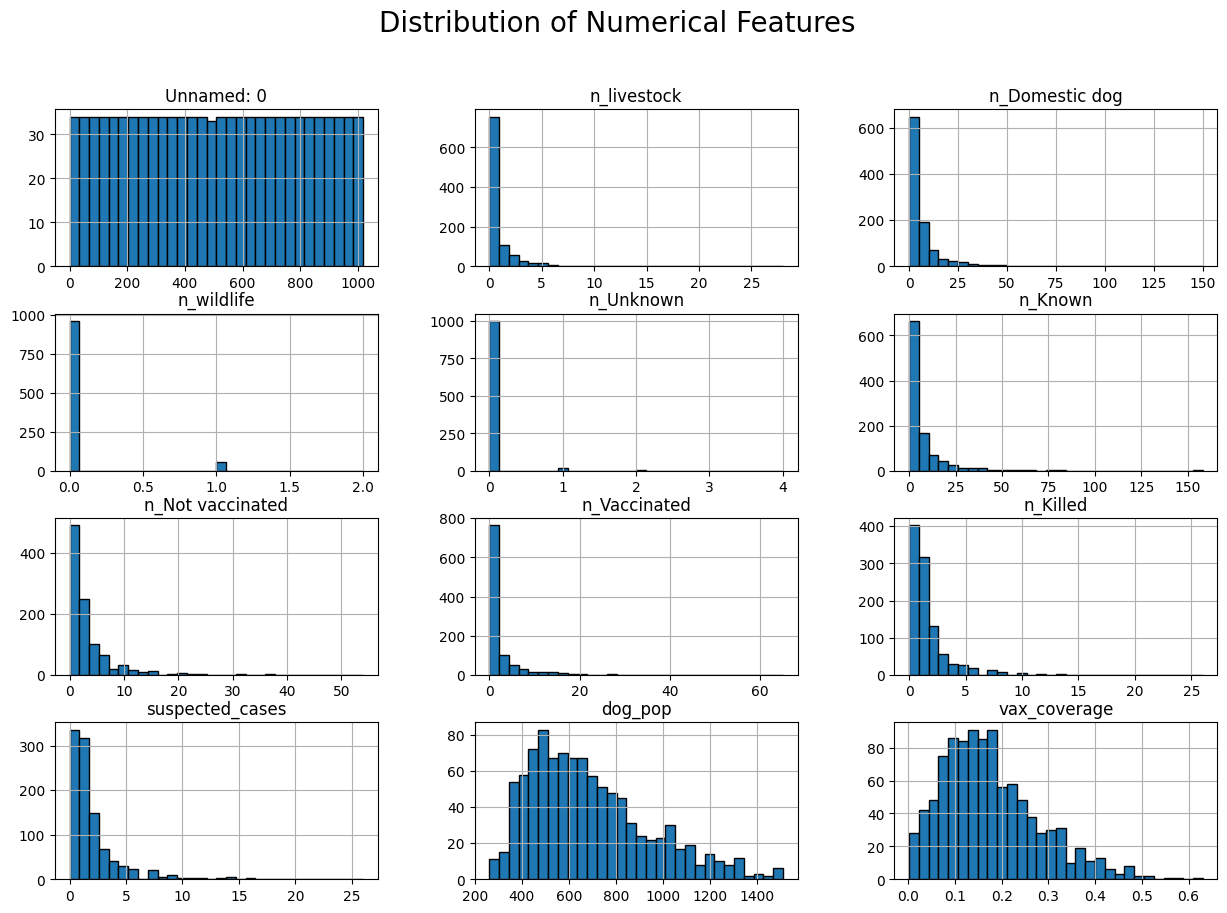

In [ ]:
# Plotting distributions for numerical features
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=20)
plt.show()


In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# Checking the column names in the DataFrame
print(df.columns)



Index(['Unnamed: 0', 'n_livestock', 'n_Domestic dog', 'n_wildlife',
       'n_Unknown', 'n_Known', 'n_Not vaccinated', 'n_Vaccinated', 'n_Killed',
       'suspected_cases',
       ...
       'Ward_Natta', 'Ward_Nyamatare', 'Ward_Nyambureti', 'Ward_Nyamoko',
       'Ward_Nyansurura', 'Ward_Rigicha', 'Ward_Ring'wani', 'Ward_Rung'abure',
       'Ward_Sedeco', 'Ward_Uwanja wa Ndege'],
      dtype='object', length=1056)


In [31]:
from sklearn.model_selection import train_test_split

# Excluding 'suspected_cases' and 'Unnamed: 0' from features, Although i didn't remove the unmaned:0
X = df.drop(['suspected_cases','suspected_cases', ], axis=1)

# Target variable
y = df['suspected_cases']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((815, 1055), (204, 1055), (815,), (204,))

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Initializing the imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='constant')

# Fitting the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing the model
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the imputed data
rf_model.fit(X_train_imputed, y_train)

# Predicting on the imputed test set
y_pred = rf_model.predict(X_test_imputed)

In [58]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7009803921568627

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        59
           1       0.79      0.84      0.81        62
           2       0.66      0.68      0.67        34
           3       0.35      0.43      0.39        14
           4       0.43      0.23      0.30        13
           5       0.50      0.25      0.33         8
           6       1.00      0.20      0.33         5
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2

    accuracy                           0.70       204
   macro avg       0.38      0.30      0.31       204
weighted avg       0.67      0.70      0.67       204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# --- XGBoost Model ---
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = le.fit_transform(y_train)

# Transform the testing labels (using the encoder fitted on training data)
y_test_encoded = le.transform(y_test)

# Train the XGBoost model with encoded labels
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_imputed, y_train_encoded)

# Make predictions using encoded test data
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Inverse transform the predictions to get original labels
y_pred_original = le.inverse_transform(y_pred_xgb)

# Evaluate the XGBoost model using the original labels
accuracy_xgb = accuracy_score(y_test, y_pred_original)
report_xgb = classification_report(y_test, y_pred_original)

print(f"XGBoost Model Accuracy: {accuracy_xgb}")
print("\nXGBoost Model Classification Report:\n", report_xgb)

XGBoost Model Accuracy: 0.7107843137254902

XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        59
           1       0.82      0.81      0.81        62
           2       0.79      0.68      0.73        34
           3       0.43      0.43      0.43        14
           4       0.75      0.46      0.57        13
           5       0.38      0.38      0.38         8
           6       0.40      0.40      0.40         5
           7       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0

    accuracy                           0.71       20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
from sklearn.ensemble import VotingClassifier

# Example with RandomForest and XGBoost
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

voting_model.fit(X_train_imputed, y_train)
y_pred_voting = voting_model.predict(X_test_imputed)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

print(f"Voting Model Accuracy: {accuracy_voting}")
print("\nVoting Model Classification Report:\n", report_voting)


Voting Model Accuracy: 0.7156862745098039

Voting Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        59
           1       0.80      0.82      0.81        62
           2       0.77      0.68      0.72        34
           3       0.46      0.43      0.44        14
           4       0.67      0.46      0.55        13
           5       0.50      0.38      0.43         8
           6       0.40      0.40      0.40         5
           7       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0

    accuracy                           0.72       204
   macro avg       0.33      0.32      0.32       204


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Download the model file
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>